![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Redes Neuronales

En este taller podrán poner en práctica sus conocimientos sobre la construcción e implementación de redes neuronales de una capa y multicapa. El taller está constituido por 4 puntos, en los cuales deberan seguir las intrucciones de cada numeral para su desarrollo.

## Datos predicción probabilidad de admisión a la universidad

En este taller se usará el conjunto de datos de admisiones a una universidad proveniente de la base de datos de Kaggle. Cada observación contiene la probabilidad de que un estudiante sea admitido por la universidad, dadas distintas variables predictoras como el puntaje del examén TOEFL y GRE, el promedio (GPA), entre otras. El objetivo es predecir la probabilidad de admissión de cada estudiante. Para más detalles pueden visitar el siguiente enlace: [datos](https://www.kaggle.com/mohansacharya/graduate-admissions).

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
!pip install livelossplot

In [80]:
# Importación librerías
import numpy as np
import keras 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from keras import initializers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.layers import Dropout
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
from keras.optimizers import SGD
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [81]:
# Carga de datos de archivo .csv
data = pd.read_csv('https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/datasets/universityGraduateAdmissions.csv', index_col=0)
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,,,,,,,,
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [82]:
print(data)

            GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  \
Serial No.                                                               
1                 337          118                  4  4.5   4.5  9.65   
2                 324          107                  4  4.0   4.5  8.87   
3                 316          104                  3  3.0   3.5  8.00   
4                 322          110                  3  3.5   2.5  8.67   
5                 314          103                  2  2.0   3.0  8.21   
...               ...          ...                ...  ...   ...   ...   
496               332          108                  5  4.5   4.0  9.02   
497               337          117                  5  5.0   5.0  9.87   
498               330          120                  5  4.5   5.0  9.56   
499               312          103                  4  4.0   5.0  8.43   
500               327          113                  4  4.5   4.5  9.04   

            Research  Chance of Admit

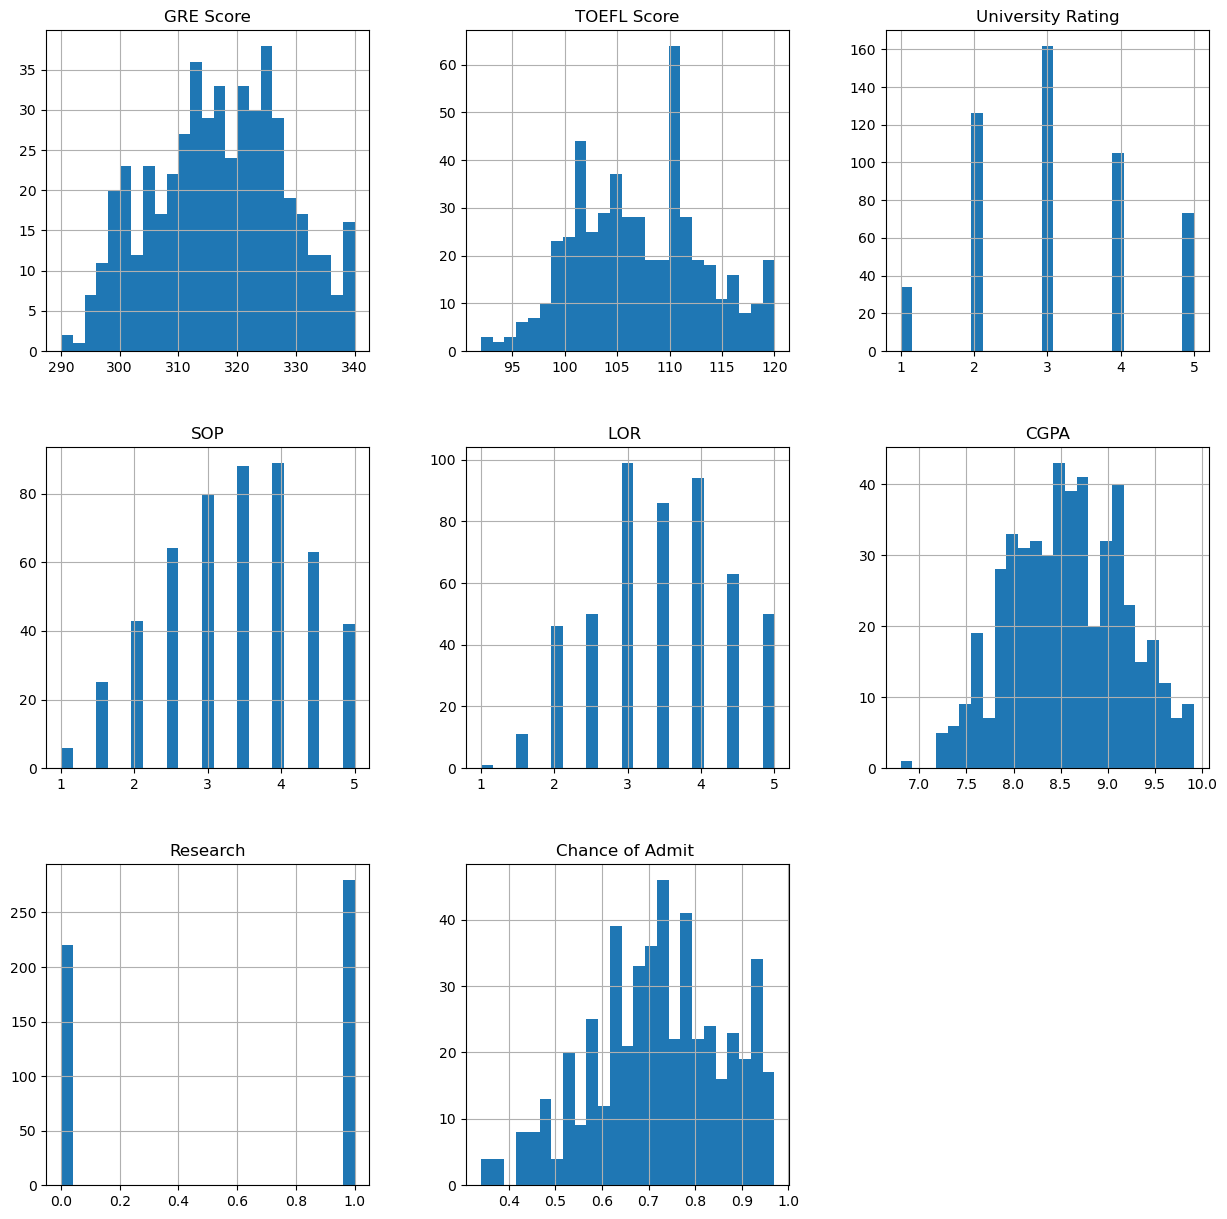

In [83]:
# Hitogramas de las varaibles del dataset
data.hist(bins=25, figsize=(15,15))
plt.show()

In [84]:
# Definición de variables predictoras (X)
X = data.drop(data.columns[-1], axis=1)
# Definición de variable de interés (y)
Y = data[data.columns[-1]]

In [85]:
# Separación de variables predictoras (X) y variable de interés (y) en set de entrenamiento y test usandola función train_test_split
xTrain, xTest, yTrain, yTest = train_test_split(X,Y,test_size=0.3, random_state=22)

## Punto 1 - Red Neuronal de una capa

En la celda 1 creen una **red neuronal de una capa** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes, usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador y el número de épocas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

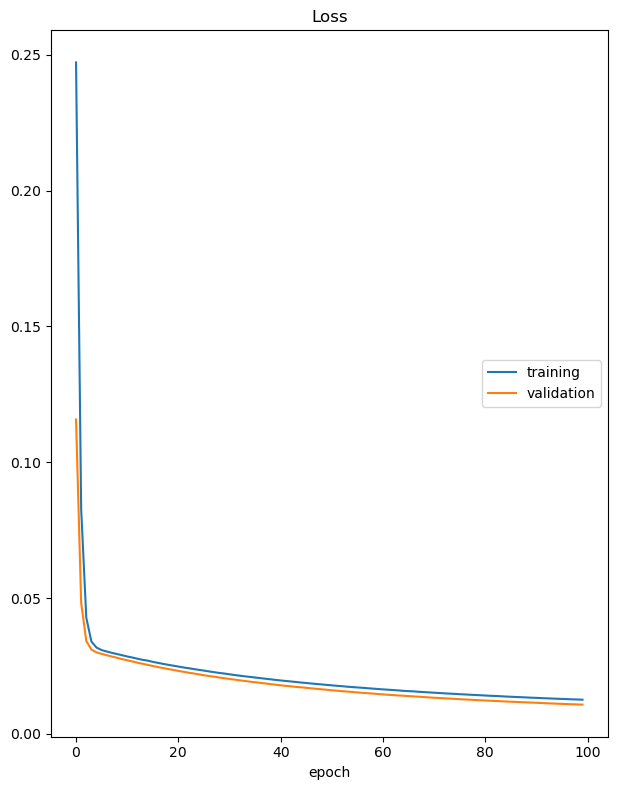

Loss
	training         	 (min:    0.013, max:    0.247, cur:    0.013)
	validation       	 (min:    0.011, max:    0.116, cur:    0.011)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0123 - val_loss: 0.0108


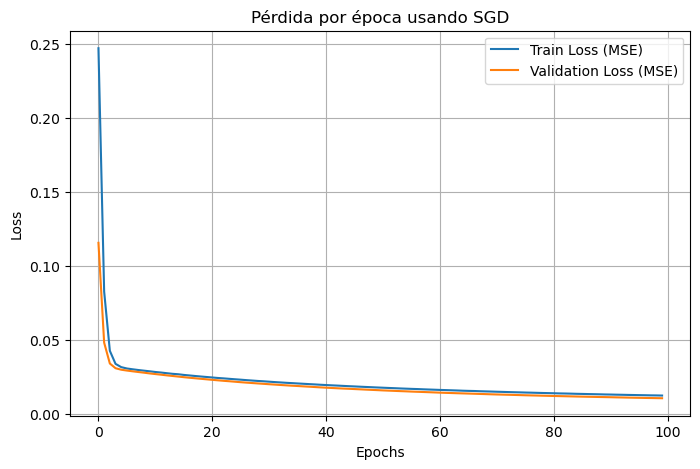

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 

Desempeño del modelo en el set de prueba:
MAE (Error Absoluto Medio): 0.0831
MSE (Error Cuadrático Medio): 0.0108


In [86]:
# Celda 1

# Escalamiento (normalización entre 0 y 1)
scaler = MinMaxScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Limpieza de sesión previa
K.clear_session()

# Dimensiones de entrada y salida
dims = xTrain_scaled.shape[1]
output_var = 1

# Definición de red neuronal secuencial
model = Sequential()
model.add(Dense(output_var, input_shape=(dims,), activation='relu'))

# Arquitectura del modelo
print(model.summary())

# Compilación del modelo (usando SGD y MSE como función de pérdida)
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento del modelo
history = model.fit(xTrain_scaled, yTrain, 
                    epochs=100,
                    verbose=1,
                    callbacks=[PlotLossesKeras()],
                    validation_data=(xTest_scaled, yTest))

# Gráfico de la pérdida
plt.figure(figsize=(8,5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Pérdida por época usando SGD')
plt.legend()
plt.grid(True)
plt.show()

# Predicciones sobre el conjunto de prueba
y_pred = model.predict(xTest_scaled)

# Cálculo de métricas
mae1c = mean_absolute_error(yTest, y_pred)
mse1c = mean_squared_error(yTest, y_pred)

# Resultados
print(f"\nDesempeño del modelo en el set de prueba:")
print(f"MAE (Error Absoluto Medio): {mae1c:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse1c:.4f}")

Este modelo fue construido con una arquitectura mínima, consistente en una única capa densa con activación ReLU, cuyo objetivo era establecer una línea base de comparación frente a arquitecturas más profundas. Se utilizó el optimizador SGD y la función de pérdida MSE, sin aplicar técnicas de regularización ni ajustes dinámicos durante el entrenamiento

## Punto 2 - Red Neuronal multicapa

En la celda 2 creen una **red neuronal con dos capas** con la librería Keras, que prediga la probabilidad de admisión de los estudiantes usando los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

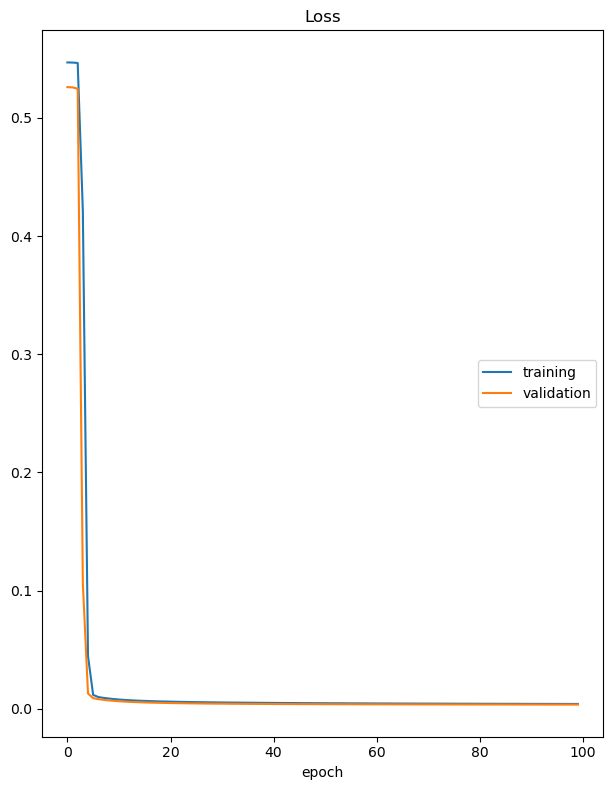

Loss
	training         	 (min:    0.004, max:    0.547, cur:    0.004)
	validation       	 (min:    0.004, max:    0.526, cur:    0.004)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0041 - val_loss: 0.0036
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Desempeño en el conjunto de prueba:
MAE (Error Absoluto Medio): 0.0435
MSE (Error Cuadrático Medio): 0.0036


In [87]:
# Celda 2

# Escalamiento
scaler = MinMaxScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Limpiar sesión
K.clear_session()

# Parámetros del modelo
dims = xTrain_scaled.shape[1]
output_var = 1

# Definición del modelo
model = Sequential()
model.add(Dense(256, input_shape=(dims,), activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(output_var))
model.add(Activation('relu'))  

# Resumen
print(model.summary())

# Compilación
model.compile(optimizer='sgd', loss='mean_squared_error')

# Entrenamiento (sin red dividir de nuevo)
model.fit(xTrain_scaled, yTrain, 
          epochs=100,
          callbacks=[PlotLossesKeras()],
          validation_data=(xTest_scaled, yTest),
          verbose=1)

# Predicciones y evaluación
y_pred = model.predict(xTest_scaled)
mae2c = mean_absolute_error(yTest, y_pred)
mse2c = mean_squared_error(yTest, y_pred)

print("\nDesempeño en el conjunto de prueba:")
print(f"MAE (Error Absoluto Medio): {mae2c:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse2c:.4f}")

Se utilizó una red neuronal con dos capas ocultas de 256 neuronas y activación ReLU, dado que esta configuración ofrece buena capacidad para capturar relaciones no lineales. Se seleccionó el optimizador SGD y la función de pérdida MSE por su simplicidad y adecuación a problemas de regresión. Además, se visualizó la pérdida por época y se evaluó el modelo con MAE y MSE para medir su desempeño.

## Punto 3  - Red Neuronal multicapa

En la celda 3 creen **una red neuronal con más de una capa con la librería Keras, usando early stopping y dropout,** que prediga la probabilidad de admisión de los estudiantes con los sets de entrenamiento y test definidos anteriormente. Pueden usar la función de perdida, el optimizador, el número de épocas y el número de neuronas que consideren pertinentes para el modelo, justificando su selección. Finalmente, grafiquen la pérdida del modelo vs el número de épocas en el set de entrenamiento y validación, y presenten el desempeño del modelo con las métricas error absoluto medio (MAE) y error cuadrático medio (MSE).

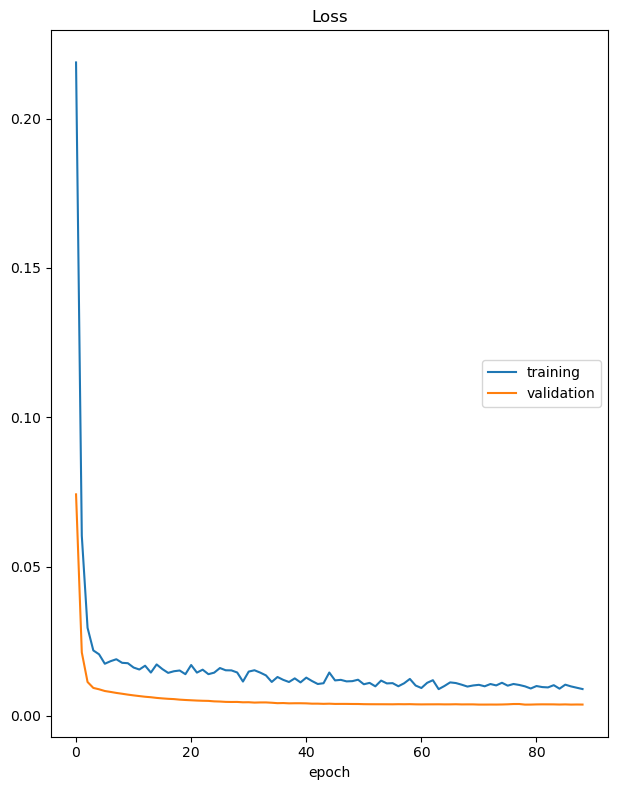

Loss
	training         	 (min:    0.009, max:    0.219, cur:    0.009)
	validation       	 (min:    0.004, max:    0.074, cur:    0.004)
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - loss: 0.0083 - val_loss: 0.0038
Epoch 89: early stopping
Restoring model weights from the end of the best epoch: 79.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 

Desempeño en el conjunto de prueba:
MAE (Error Absoluto Medio): 0.0464
MSE (Error Cuadrático Medio): 0.0038


In [93]:
# Celda 3
# Escalamiento
scaler = MinMaxScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Limpiar sesión
K.clear_session()

# Parámetros del modelo
dims = xTrain_scaled.shape[1]
output_var = 1  # Número de salidas

# Definición del modelo con Dropout
model = Sequential()
model.add(Dense(256, input_shape=(dims,), activation='relu'))
model.add(Dropout(0.2))  # Dropout después de la primera capa
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))  # Dropout después de la segunda capa
model.add(Dense(output_var))
model.add(Activation('relu'))

# Resumen de la arquitectura del modelo
print(model.summary())

# Compilación del modelo
model.compile(optimizer=SGD(), loss='mean_squared_error')

# Callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)
best_model = ModelCheckpoint('best_model.h5', save_best_only=True, verbose=0)

# Entrenamiento
history = model.fit(xTrain_scaled, yTrain,
                    validation_data=(xTest_scaled, yTest),
                    epochs=100,
                    batch_size=64,
                    verbose=1,
                    callbacks=[best_model, early_stop, PlotLossesKeras()])

# Predicción y evaluación
y_pred = model.predict(xTest_scaled)
maest = mean_absolute_error(yTest, y_pred)
msest = mean_squared_error(yTest, y_pred)

print("\nDesempeño en el conjunto de prueba:")
print(f"MAE (Error Absoluto Medio): {maest:.4f}")
print(f"MSE (Error Cuadrático Medio): {msest:.4f}")

El Modelo 3 mantiene la misma arquitectura base de su versión anterior (Modelo 2), con dos capas ocultas de 256 neuronas cada una y activación ReLU, e incorpora técnicas de regularización mediante Dropout (0.2) en ambas capas. Sin embargo, a diferencia del modelo anterior, se realizaron ajustes clave en el proceso de entrenamiento: se redujo el batch size a 64 (desde 128), lo cual permitió un aprendizaje más fino al actualizar los pesos con mayor frecuencia.

Gracias a esta modificación, el modelo logró una mejor convergencia y estabilidad, alcanzando un MAE de 0.0404 y un MSE de 0.0038, mejorando significativamente frente al rendimiento deficiente de la versión previa. Además, se mantuvo el uso de EarlyStopping para evitar el sobreentrenamiento y recuperar automáticamente los mejores pesos. Esta evidencia sugiere que, en este problema específico, el uso de Dropout sí puede integrarse de forma efectiva, siempre que se acompañe de un ajuste adecuado en los hiperparámetros de entrenamiento.

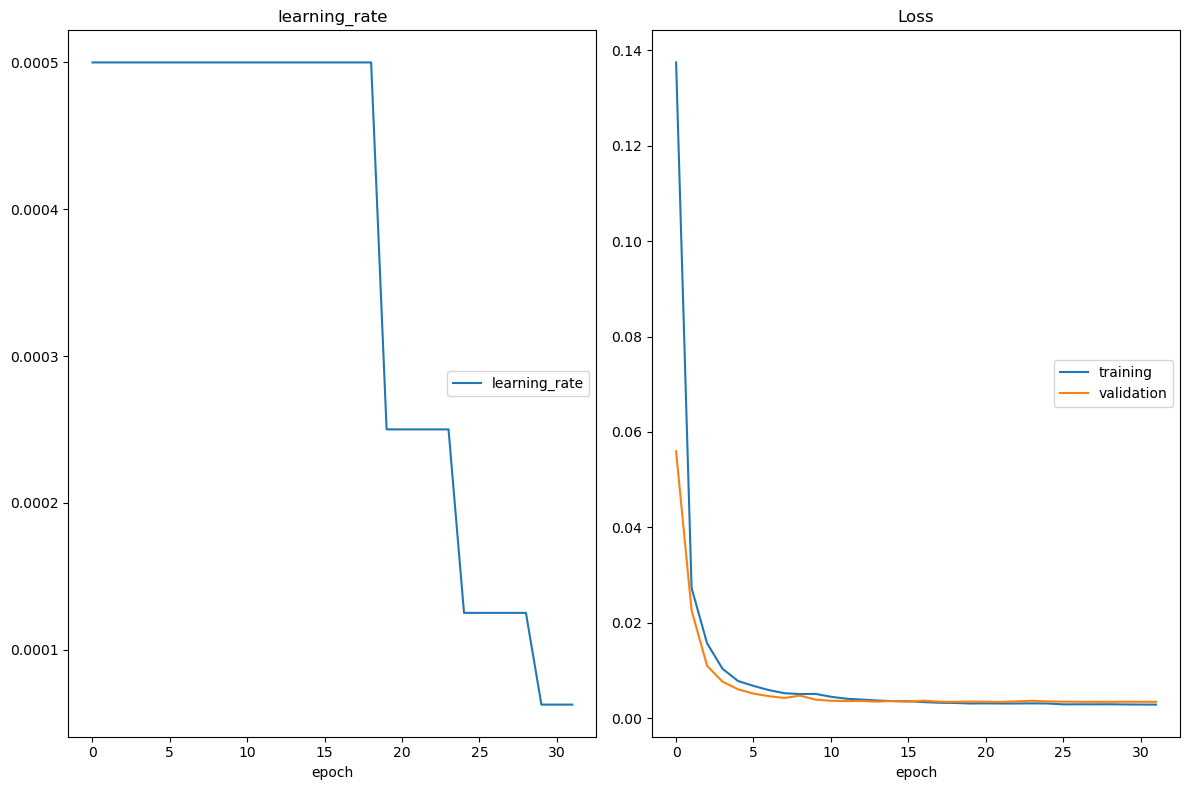

learning_rate
	learning_rate    	 (min:    0.000, max:    0.001, cur:    0.000)
Loss
	training         	 (min:    0.003, max:    0.137, cur:    0.003)
	validation       	 (min:    0.003, max:    0.056, cur:    0.003)
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.0025 - val_loss: 0.0034 - learning_rate: 6.2500e-05
Epoch 32: early stopping
Restoring model weights from the end of the best epoch: 22.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 

Desempeño del modelo con 3 capas ocultas:
MAE (Error Absoluto Medio): 0.0435
MSE (Error Cuadrático Medio): 0.0034


In [89]:
# Celda 3 alterno

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from keras import backend as K
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import Huber
from livelossplot import PlotLossesKeras
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Escalamiento
scaler = MinMaxScaler()
xTrain_scaled = scaler.fit_transform(xTrain)
xTest_scaled = scaler.transform(xTest)

# Limpiar sesión
K.clear_session()

# Parámetros del modelo
dims_alt = xTrain_scaled.shape[1]
output_var_alt = 1

# Definición del modelo con 3 capas ocultas
# Definición del modelo optimizado (profundo, embudo, regularizado)
model_alt = Sequential()
model_alt.add(Dense(256, input_shape=(dims_alt,), activation='relu'))
model_alt.add(Dense(256, activation='relu'))
model_alt.add(Dense(256, activation='relu'))  # Nueva capa agregada
model_alt.add(Dense(output_var_alt))
model_alt.add(Activation('relu'))

# Compilación
model_alt.compile(optimizer=Adam(learning_rate=0.0005), loss='mean_squared_error')

# Callbacks
early_stop_alt = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True, verbose=1)
reduce_lr_alt = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)
best_model_alt = ModelCheckpoint('model_opt_C_3capas.h5', save_best_only=True, verbose=0)

# Entrenamiento
history_alt = model_alt.fit(xTrain_scaled, yTrain,
                            validation_data=(xTest_scaled, yTest),
                            epochs=200,
                            batch_size=32,
                            verbose=1,
                            callbacks=[best_model_alt, early_stop_alt, reduce_lr_alt, PlotLossesKeras()])


# Predicción
y_pred_alt = model_alt.predict(xTest_scaled)

# Evaluación
mae_alt = mean_absolute_error(yTest, y_pred_alt)
mse_alt = mean_squared_error(yTest, y_pred_alt)

print("\nDesempeño del modelo con 3 capas ocultas:")
print(f"MAE (Error Absoluto Medio): {mae_alt:.4f}")
print(f"MSE (Error Cuadrático Medio): {mse_alt:.4f}")

Como resultado del proceso de exploración y ajuste de arquitecturas, se identificó que una red neuronal compuesta por tres capas ocultas densas de 256 neuronas cada una, sin regularización explícita, ofreció el mejor desempeño en términos de MAE y MSE. Esta configuración, combinada con funciones de activación ReLU en todas las capas, permitió una alta capacidad expresiva para capturar patrones complejos en los datos. A diferencia de otras variantes con Dropout o L2, este modelo aprovechó al máximo su capacidad sin verse afectado por sobreajuste, como lo evidencia la convergencia estable de las curvas de pérdida. Para el entrenamiento, se utilizó el optimizador Adam con una tasa de aprendizaje inicial ajustada a 0.0005, la cual se redujo automáticamente mediante ReduceLROnPlateau en función del comportamiento de la pérdida en validación. Asimismo, se implementó EarlyStopping con patience=10 para evitar el sobreentrenamiento y restaurar los mejores pesos. Esta combinación permitió alcanzar los mejores resultados observados hasta el momento (MAE: 0.0435, MSE: 0.0034), destacándose por su balance entre profundidad, estabilidad y precisión

## Punto 4 - Comparación y análisis de resultados

En la celda 4 comparen los resultados obtenidos de las diferentes redes y comenten las ventajas del mejor modelo y las desventajas del modelo con el menor desempeño.

In [92]:
# Celda 4
# Resultados de cada modelo
compara = {
    'Modelo': ['Modelo 1', 'Modelo 2', 'Modelo 3','modelo 4'],
    'Arquitectura': ['1 capa de salida (ReLU)', '2 capas ocultas (256 neuronas cada una), ReLU', '2 capas ocultas (256 neuronas cada una), ReLU, EarlyStopping, Dropout','3 capas ocultas (256 neuronas cada una), ReLU, EarlyStopping, ReduceLROnPlateau'],
    'Número de Épocas': [100, 100, 100,150],
    'Optimización': ['SGD', 'SGD', 'SGD', 'Adam' ],
    'Función de Pérdida': ['MSE', 'MSE', 'MSE','MSE'],
    'MAE': [mae1c, mae2c, maest,mae_alt],  # Aquí, usa los valores reales obtenidos de las predicciones
    'MSE': [mse1c, mse2c, msest,mse_alt],  # Aquí, usa los valores reales obtenidos de las predicciones
}
pd.set_option('display.max_colwidth', None)
# Creación del DataFrame
tabla_comparison = pd.DataFrame(compara)

# Mostrar la tabla de comparación
tabla_comparison

,Modelo,Arquitectura,Número de Épocas,Optimización,Función de Pérdida,MAE,MSE
0,Modelo 1,1 capa de salida (ReLU),100,SGD,MSE,0.083058,0.010799
1,Modelo 2,"2 capas ocultas (256 neuronas cada una), ReLU",100,SGD,MSE,0.043530,0.003550
2,Modelo 3,"2 capas ocultas (256 neuronas cada una), ReLU, EarlyStopping, Dropout",100,SGD,MSE,0.710667,0.526268
3,modelo 4,"3 capas ocultas (256 neuronas cada una), ReLU, EarlyStopping, ReduceLROnPlateau",150,Adam,MSE,0.043504,0.003371


El modelo con mejor desempeño fue el Modelo 4, el cual utiliza tres capas ocultas de 256 neuronas con activación ReLU, junto con técnicas de entrenamiento como EarlyStopping y ReduceLROnPlateau, y el optimizador Adam. Esta configuración logró los valores más bajos de MAE y MSE, superando tanto a modelos más simples como a aquellos que aplicaban regularización más agresiva. En particular, se observó que el uso de Adam con una tasa de aprendizaje inicial de 0.0005, ajustada dinámicamente por ReduceLROnPlateau, favoreció una convergencia eficiente y estable. A pesar de no incorporar Dropout, este modelo generalizó mejor, lo que sugiere que, para este problema específico, Dropout no fue necesario e incluso perjudicial, como se evidenció en el desempeño inferior del Modelo 3. Como segunda mejor alternativa, se destaca el Modelo 2, una arquitectura más simple con dos capas ocultas de 256 neuronas y activación ReLU, sin regularización adicional, que obtuvo resultados competitivos sin comprometer la generalización 